In [171]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [172]:
import pickle

with open('data.pk1', 'rb') as f:
    X, y = pickle.load(f)

## Decision Tree Model

In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt


In [174]:
def train_and_report_decision_tree(X_train, X_test, y_train, y_test, max_depth = None, plot = False):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if plot:
        if max_depth == 1:
            plt.figure(figsize=(8, 10))

        else:
            plt.figure(figsize=(20,10))
            
        tree.plot_tree(model, filled=True, max_depth=4)

    return accuracy_score(y_test, y_pred)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
accuracy = train_and_report_decision_tree(X_train, X_test, y_train, y_test)
print(accuracy)

0.8194837674594186


Trying with different depths
- The fact that the accuracy decreases as the max_depth for the tree increases indicates that a simple model may be better for our data.  

Max Depth: 1, Accuracy: 0.8772
Max Depth: 3, Accuracy: 0.8772
Max Depth: 5, Accuracy: 0.8776
Max Depth: 7, Accuracy: 0.8774
Max Depth: 10, Accuracy: 0.8761
Max Depth: 12, Accuracy: 0.8747
Max Depth: 15, Accuracy: 0.8692


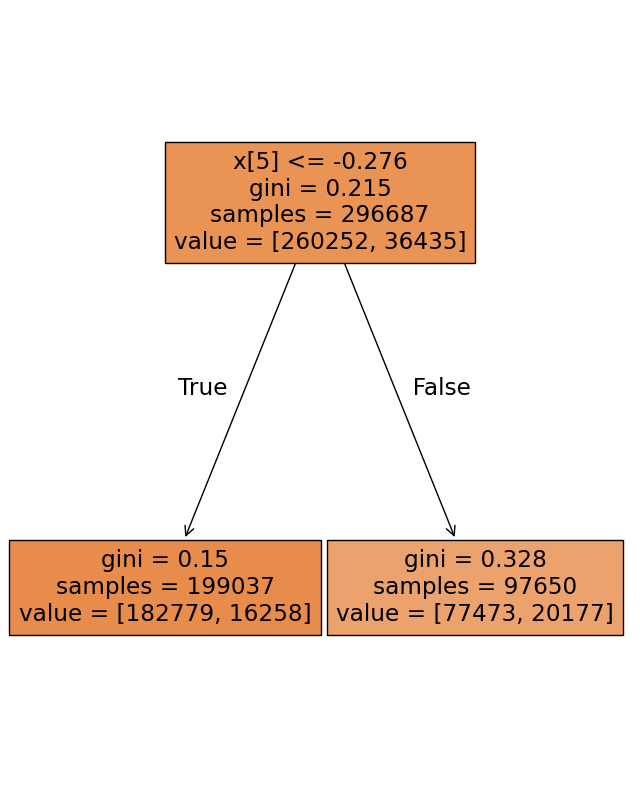

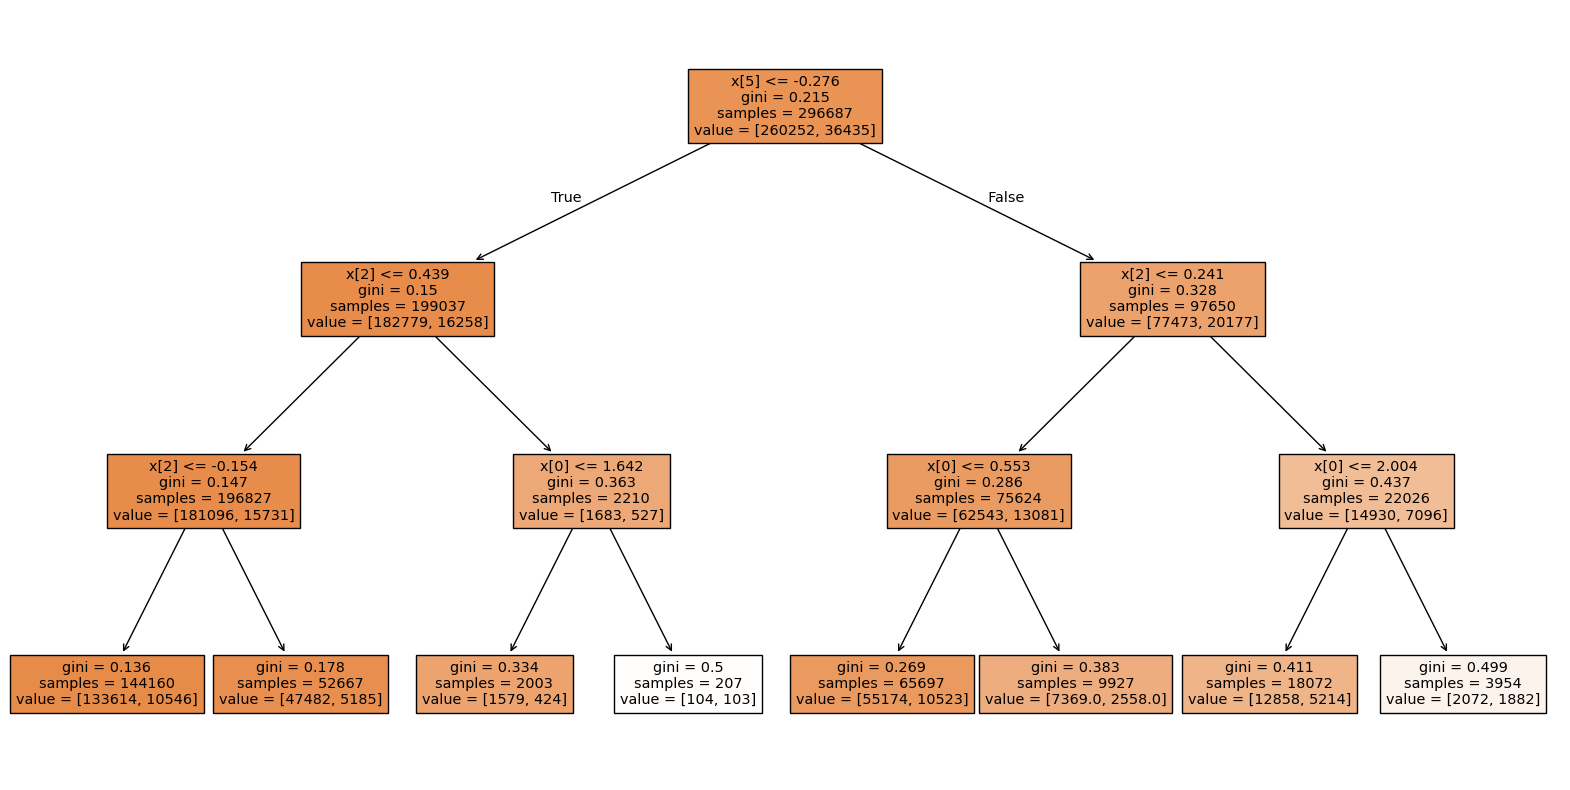

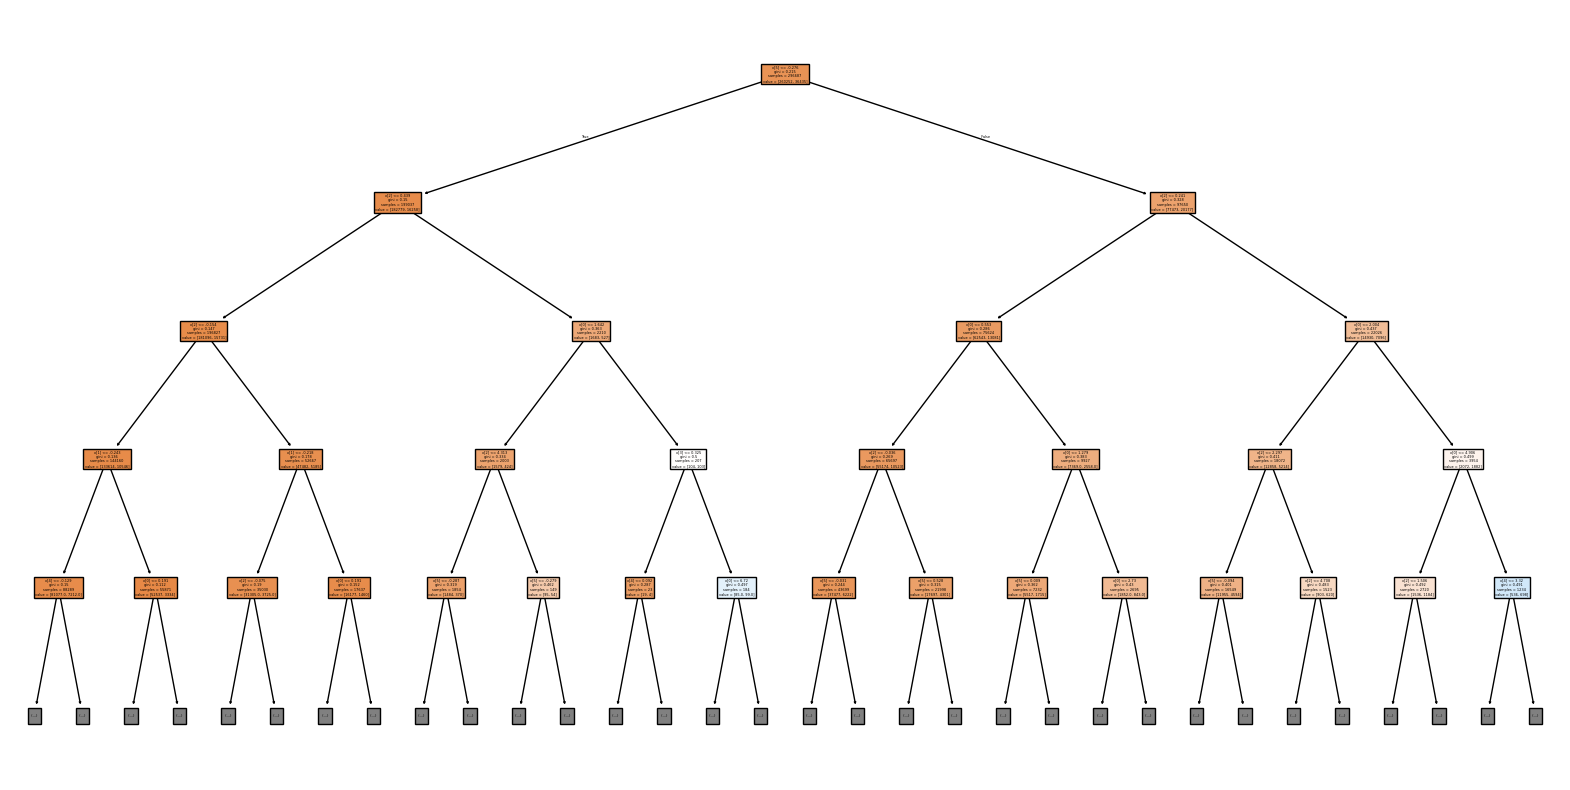

In [178]:
max_depths = {1: "", 3: "", 5:"", 7:"", 10:"", 12:"", 15:""}

for i in max_depths:
    if i <= 5:
        accuracy = train_and_report_decision_tree(X_train, X_test, y_train, y_test, max_depth=i, plot=True)
    else: 
        accuracy = train_and_report_decision_tree(X_train, X_test, y_train, y_test, max_depth=i, plot=False)
    max_depths[i] = accuracy
    print(f"Max Depth: {i}, Accuracy: {accuracy:.4f}")